# Setting

In [1]:
import bt
import FinanceDataReader as fdr
import pandas as pd

from pf_utils import import_rate1, import_rate2, get_price
from pf_utils import Backtest, get_start_dates, metrics

In [2]:
path_data = 'data'

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Data

## TDF

In [4]:
file = 'K55206C95800.csv'

# 2024.06.10 기준가:	1,291.67
# 2023.06.14 기준가:	1,154.82	
data_check = [
    ('2024-6-10', 1291.67),
    ('2023-6-14', 1154.82)
]

df = import_rate1(file, path_data)
df = get_price(df, data_check)
df

error: 0.00 %


date
2018-07-26     958.141087
2018-07-27     959.099229
2018-07-30     960.823883
2018-07-31     959.769927
2018-08-01     959.386671
                 ...     
2024-06-07    1284.771384
2024-06-10    1291.670000
2024-06-11    1290.424417
2024-06-12    1292.915583
2024-06-13    1293.011398
Name: K55206C95800, Length: 1455, dtype: float64

In [5]:
df_tdf_all = df.to_frame()
df_tdf_all.head()

,K55206C95800
date,
2018-07-26,958.141087
2018-07-27,959.099229
2018-07-30,960.823883
2018-07-31,959.769927
2018-08-01,959.386671


In [6]:
file = 'K55301BU6139.csv'

# 2024.06.12	1,464.07	
# 2023.06.14	1,267.58	
data_check = [
    ('2024-6-12', 1464.07),
    ('2023-6-14', 1267.58)
]

df = import_rate2(file, path_data)
df = get_price(df, data_check)
df

error: 0.03 %


date
2021-06-12     1324.71046
2021-06-13     1324.71046
2021-06-14    1327.492352
2021-06-15    1328.817062
2021-06-16    1326.300112
                 ...     
2024-06-08    1463.937529
2024-06-09    1463.937529
2024-06-10    1463.407645
2024-06-11    1466.057066
2024-06-12        1464.07
Name: K55301BU6139, Length: 1097, dtype: object

In [7]:
df_tdf_all = df_tdf_all.join(df)
df_tdf_all.tail()

,K55206C95800,K55301BU6139
date,,
2024-06-07,1284.771384,1463.937529
2024-06-10,1291.670000,1463.407645
2024-06-11,1290.424417,1466.057066
2024-06-12,1292.915583,1464.07
2024-06-13,1293.011398,NaN


In [8]:
tdf_names ={
    'K55206C95800': '키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)',
    'K55301BU6139': '미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e'
}

In [9]:
commissions = {
    'K55206C95800': 0.49, # yearly
    'K55301BU6139': 0.6, # yearly
}
{tdf_names[k]:v for k,v in commissions.items()}

{'키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)': 0.49,
 '미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e': 0.6}

In [10]:
get_start_dates(df_tdf_all)

,start date
K55206C95800,2018-07-26
K55301BU6139,2021-06-14


In [11]:
start_date = '2021-06-14'

In [12]:
df_tdf = df_tdf_all.loc[start_date:]

In [13]:
df_tdf.isna().sum()

K55206C95800    0
K55301BU6139    1
dtype: int64

In [14]:
df_tdf = df_tdf.ffill()

In [15]:
df_tdf

,K55206C95800,K55301BU6139
date,,
2021-06-14,1246.349927,1327.492352
2021-06-15,1249.415978,1328.817062
2021-06-16,1250.278305,1326.300112
2021-06-17,1249.128536,1324.975402
2021-06-18,1251.044818,1323.385749
...,...,...
2024-06-07,1284.771384,1463.937529
2024-06-10,1291.670000,1463.407645
2024-06-11,1290.424417,1466.057066


## ETF

In [16]:
file = 'etfs_selected_240611.csv'
df_etf_all = pd.read_csv(f'{path_data}/{file}', parse_dates=[0], index_col=0)
df_etf_all.head()

,273130,453850,284430,069500,379800,411060,305080,304660,148070,261220
Date,,,,,,,,,,
2002-10-14,NaN,NaN,NaN,5184,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-15,NaN,NaN,NaN,5312,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-16,NaN,NaN,NaN,5335,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-17,NaN,NaN,NaN,5410,NaN,NaN,NaN,NaN,NaN,NaN
2002-10-18,NaN,NaN,NaN,5642,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_sym = fdr.StockListing('ETF/KR') # 한국 ETF 전종목

symbols = df_etf_all.columns
etf_names = df_sym.loc[df_sym.Symbol.isin(symbols)].set_index('Symbol')['Name'].to_dict()
etf_names

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '379800': 'KODEX 미국S&P500TR',
 '453850': 'ACE 미국30년국채액티브(H)',
 '148070': 'KOSEF 국고채10년',
 '304660': 'KODEX 미국30년국채울트라선물(H)',
 '411060': 'ACE KRX금현물',
 '305080': 'TIGER 미국채10년선물',
 '284430': 'KODEX 200미국채혼합',
 '261220': 'KODEX WTI원유선물(H)'}

In [18]:
#etf = ['069500', '148070', '305080', '379800']
etf = ['069500', '273130', '148070', '379800']
{x: etf_names[x] for x in etf}

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '148070': 'KOSEF 국고채10년',
 '379800': 'KODEX 미국S&P500TR'}

In [19]:
df_etf = df_etf_all.loc[start_date:, etf]
get_start_dates(df_etf)

,start date
069500,2021-06-14
273130,2021-06-14
148070,2021-06-14
379800,2021-06-14


# Backtest

In [20]:
asset_names = etf_names.copy()
asset_names.update(tdf_names)
asset_names

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '379800': 'KODEX 미국S&P500TR',
 '453850': 'ACE 미국30년국채액티브(H)',
 '148070': 'KOSEF 국고채10년',
 '304660': 'KODEX 미국30년국채울트라선물(H)',
 '411060': 'ACE KRX금현물',
 '305080': 'TIGER 미국채10년선물',
 '284430': 'KODEX 200미국채혼합',
 '261220': 'KODEX WTI원유선물(H)',
 'K55206C95800': '키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)',
 'K55301BU6139': '미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e'}

In [21]:
bts = Backtest(metrics, initial_capital=10000000,
              asset_names=asset_names, 
              commissions=None)

In [22]:
name = 'KOSPI'
index = df_tdf.index
df = df_etf.loc[index.min():index.max(), '069500']
bts.buy_n_hold(df, name=name)

In [23]:
name = 'TDF COMB'
weights = [0.5, 0.5]
weights = dict(zip(df_tdf.columns, weights))
bts.build(df_tdf, weights, name, period='Y')

In [24]:
name = 'TDF COMB w/fee'
weights = [0.5, 0.5]
weights = dict(zip(df_tdf.columns, weights))
bts.build(df_tdf, weights, name, period='Y', commissions=commissions)

In [25]:
name = 'TDF COMB DCA'
weights = [0.5, 0.5]
weights = dict(zip(df_tdf.columns, weights))
bts.build(df_tdf, weights, name, period='M', 
          initial_capital=0, capital_flow=1000000)

In [26]:
name = 'TDF COMB DCA w/fee'
weights = [0.5, 0.5]
weights = dict(zip(df_tdf.columns, weights))
bts.build(df_tdf, weights, name, period='M', 
          initial_capital=0, capital_flow=1000000, commissions=commissions)

In [27]:
name = 'ETF COMB1'
weights = [0.2, 0.2, 0.3, 0.3]
weights = dict(zip(etf, weights))
bts.build(df_etf, weights, name, period='Y')

In [28]:
name = 'ETF COMB2'
weights = [0.3, 0.2, 0.3, 0.2]
weights = dict(zip(etf, weights))
bts.build(df_etf, weights, name, period='Y')

In [40]:
name = 'TDF COMB DCA2'
weights = [0.5, 0.5]
weights = dict(zip(df_tdf.columns, weights))
bts.build(df_tdf, weights, name, period='Q', 
          #initial_capital=0, 
          capital_flow=5000000, commissions=commissions)

,KOSPI,TDF COMB,TDF COMB w/fee,TDF COMB DCA,TDF COMB DCA w/fee,ETF COMB1,ETF COMB2,TDF COMB DCA2
start,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,-0.090013,0.069546,0.063616,0.063157,0.060573,0.142346,0.079898,0.073177
cagr,-0.031001,0.022701,0.020805,0.020657,0.019828,0.045434,0.025995,0.023859
max_drawdown,-0.341902,-0.174037,-0.174037,-0.16719,-0.167638,-0.142306,-0.164024,-0.155756
avg_drawdown,-0.120892,-0.020254,-0.022007,-0.022642,-0.019246,-0.011646,-0.013907,-0.014384
avg_drawdown_days,361.666667,73.714286,79.692308,93.727273,79.846154,35.821429,46.909091,63.875
daily_vol,0.168907,0.065375,0.065447,0.062148,0.062142,0.076027,0.078517,0.056801
daily_sharpe,-0.106629,0.384331,0.354932,0.368015,0.354648,0.636573,0.373979,0.453524
daily_sortino,-0.181655,0.61664,0.569367,0.588259,0.566921,1.046522,0.619614,0.735584


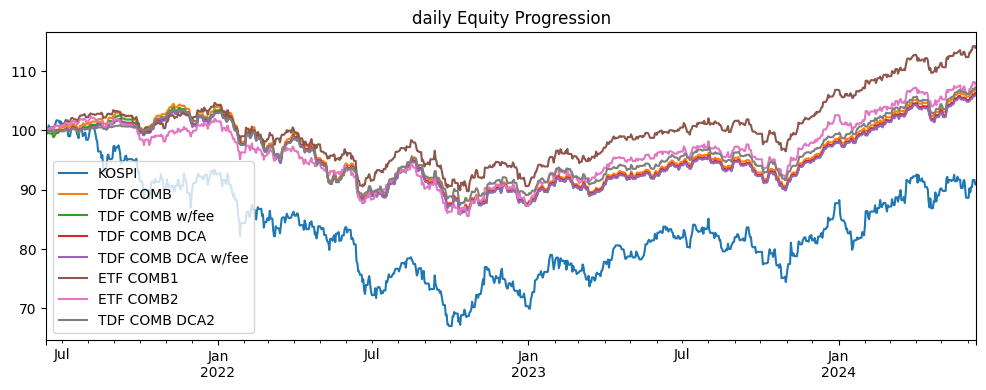

In [41]:
bts.run(figsize=(12,4))

,KOSPI,TDF COMB,TDF COMB w/fee,TDF COMB DCA,TDF COMB DCA w/fee,TDF COMB DCA2
start,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,-0.090013,0.069546,0.063616,0.063157,0.060573,0.073177
cagr,-0.031001,0.022701,0.020805,0.020657,0.019828,0.023859
max_drawdown,-0.341902,-0.174037,-0.174037,-0.16719,-0.167638,-0.155756
avg_drawdown,-0.120892,-0.020254,-0.022007,-0.022642,-0.019246,-0.014384
avg_drawdown_days,361.666667,73.714286,79.692308,93.727273,79.846154,63.875
daily_vol,0.168907,0.065375,0.065447,0.062148,0.062142,0.056801
daily_sharpe,-0.106629,0.384331,0.354932,0.368015,0.354648,0.453524
daily_sortino,-0.181655,0.61664,0.569367,0.588259,0.566921,0.735584


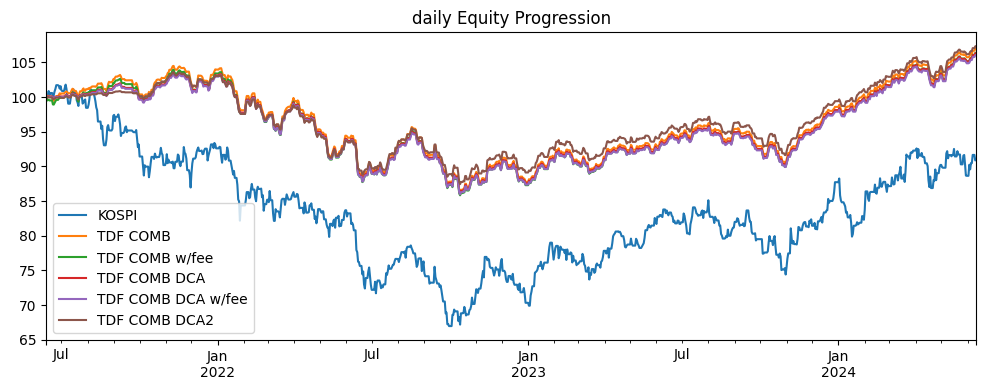

In [42]:
bts.run([0,1,2,3,4,7], figsize=(12,4))

,KOSPI,TDF COMB,TDF COMB DCA,ETF COMB1,ETF COMB2
start,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00,2021-06-13 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,-0.090013,0.069546,0.063157,0.142346,0.079898
cagr,-0.031001,0.022701,0.020657,0.045434,0.025995
max_drawdown,-0.341902,-0.174037,-0.16719,-0.142306,-0.164024
avg_drawdown,-0.120892,-0.020254,-0.022642,-0.011646,-0.013907
avg_drawdown_days,361.666667,73.714286,93.727273,35.821429,46.909091
daily_vol,0.168907,0.065375,0.062148,0.076027,0.078517
daily_sharpe,-0.106629,0.384331,0.368015,0.636573,0.373979
daily_sortino,-0.181655,0.61664,0.588259,1.046522,0.619614


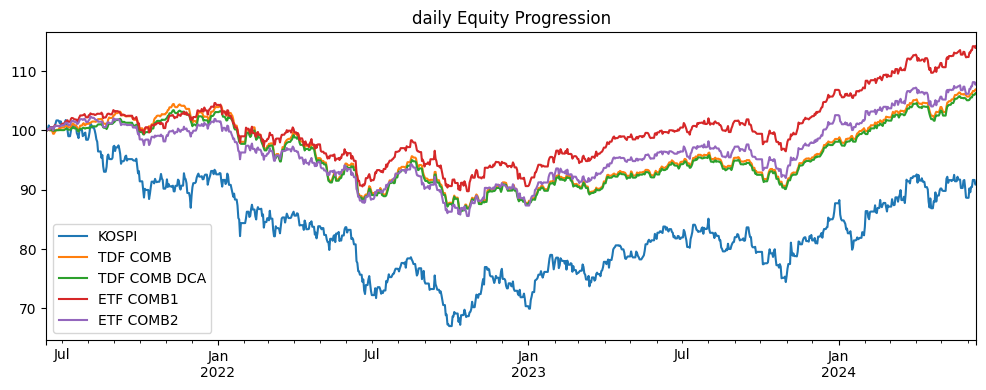

In [43]:
bts.run([0,1,3,5,6], figsize=(12,4))

In [32]:
bts.show_weights(name='ETF COMB1')

KODEX 200               0.2
KODEX 종합채권(AA-이상)액티브    0.2
KOSEF 국고채10년            0.3
KODEX 미국S&P500TR        0.3
dtype: float64

# Scaled

## Data

In [45]:
etf = ['069500', '273130', '148070', '379800']
{x: etf_names[x] for x in etf}

{'069500': 'KODEX 200',
 '273130': 'KODEX 종합채권(AA-이상)액티브',
 '148070': 'KOSEF 국고채10년',
 '379800': 'KODEX 미국S&P500TR'}

In [48]:
get_start_dates(df_etf_all[etf])

,start date
069500,2002-10-14
148070,2011-10-20
273130,2017-06-29
379800,2021-04-09


In [50]:
start_date = '2017-06-29'

In [67]:
df_snp = fdr.DataReader('S&P500')
df_snp = df_snp['Adj Close'].rename('S&P500')

In [92]:
df_rate = df_snp/df_snp[0]-1
df_rate

Date
1980-01-02     0.000000
1980-01-03    -0.005106
1980-01-04     0.007186
1980-01-07     0.009928
1980-01-08     0.030163
                ...    
2024-06-07    49.557774
2024-06-10    49.688256
2024-06-11    49.825640
2024-06-12    50.257845
2024-06-13    50.378027
Name: S&P500, Length: 11207, dtype: float64

In [96]:
df_379800 = df_etf_all['379800'].dropna()
df_379800.head()
df_379800.tail()

Date
2024-06-04    16500.0
2024-06-05    16530.0
2024-06-07    16625.0
2024-06-10    16695.0
2024-06-11    16770.0
Name: 379800, dtype: float64

In [101]:
data_check = [
    ('2024-06-11', 16770.0),
    ('2021-04-09', 10085.0)
]
df_snp_r = get_price(df_rate, data_check, rate_is_percent=False)
df_snp_r = df_snp_r.rename('S&P500_R')

error: 27.73 %


<Axes: xlabel='Date'>

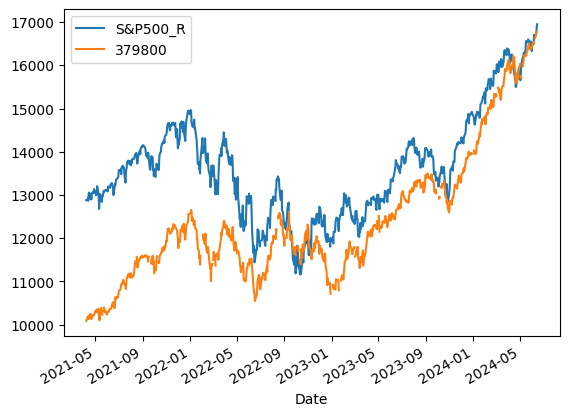

In [102]:
dt = '2021-04-09'
df_snp_r.to_frame().join(df_379800).loc[dt:].plot()

In [103]:
etf2 = ['069500', '273130', '148070']
df_etf = df_etf_all[etf2].join(df_snp_r).loc[start_date:]
df_etf = df_etf.ffill()
df_etf

,069500,273130,148070,S&P500_R
Date,,,,
2017-06-29,27193,99855.0,106044.0,7549.014665
2017-06-30,27109,99810.0,105817.0,7560.589054
2017-07-03,27170,99745.0,105613.0,7578.060320
2017-07-04,27002,99655.0,105190.0,7578.060320
2017-07-05,27105,99620.0,105253.0,7589.073356
...,...,...,...,...
2024-06-04,36390,110605.0,111850.0,16507.998052
2024-06-05,36755,110820.0,112200.0,16703.579031
2024-06-07,37240,111075.0,112610.0,16681.616938


In [104]:
df_etf = df_etf.ffill()

In [105]:
asset_names.update({'S&P500_R':'KODEX 미국S&P500TR Assumed'})

In [106]:
df_etf

,069500,273130,148070,S&P500_R
Date,,,,
2017-06-29,27193,99855.0,106044.0,7549.014665
2017-06-30,27109,99810.0,105817.0,7560.589054
2017-07-03,27170,99745.0,105613.0,7578.060320
2017-07-04,27002,99655.0,105190.0,7578.060320
2017-07-05,27105,99620.0,105253.0,7589.073356
...,...,...,...,...
2024-06-04,36390,110605.0,111850.0,16507.998052
2024-06-05,36755,110820.0,112200.0,16703.579031
2024-06-07,37240,111075.0,112610.0,16681.616938


## Backtest

In [126]:
bts = Backtest(metrics, initial_capital=10000000,
               asset_names=asset_names, 
               commissions=None)

In [127]:
name = 'KOSPI'
df = df_etf['069500']
bts.buy_n_hold(df, name=name)

In [128]:
name = 'ETF COMB1'
weights = [0.2, 0.2, 0.3, 0.3]
weights = dict(zip(df_etf.columns, weights))
bts.build(df_etf, weights, name, period='Y')

In [129]:
name = 'ETF COMB1 (M)'
weights = [0.2, 0.2, 0.3, 0.3]
weights = dict(zip(df_etf.columns, weights))
bts.build(df_etf, weights, name, period='M', capital_flow=1000000)

In [130]:
name = 'ETF COMB2'
weights = [0.3, 0.2, 0.3, 0.2]
weights = dict(zip(df_etf.columns, weights))
bts.build(df_etf, weights, name, period='Y')

,KOSPI,ETF COMB1,ETF COMB1 (M),ETF COMB2
start,2017-06-28 00:00:00,2017-06-28 00:00:00,2017-06-28 00:00:00,2017-06-28 00:00:00
end,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00,2024-06-11 00:00:00
total_return,0.359183,0.450954,0.430813,0.383078
cagr,0.045118,0.054983,0.052865,0.04774
max_drawdown,-0.380162,-0.189178,-0.190569,-0.20192
avg_drawdown,-0.047992,-0.012449,-0.012622,-0.015412
avg_drawdown_days,94.576923,26.809524,27.47561,39.288136
daily_vol,0.184222,0.078006,0.078233,0.077309
daily_sharpe,0.337775,0.743129,0.714828,0.657651
daily_sortino,0.555855,1.165093,1.118762,1.04768


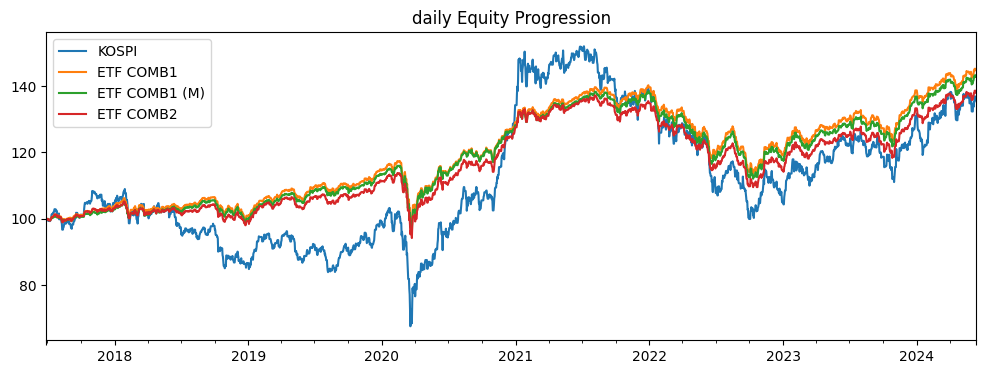

In [131]:
bts.run(figsize=(12,4))

In [133]:
bts.show_weights('ETF COMB1')

KODEX 200                   0.2
KODEX 종합채권(AA-이상)액티브        0.2
KOSEF 국고채10년                0.3
KODEX 미국S&P500TR Assumed    0.3
dtype: float64

In [134]:
bts.show_weights('ETF COMB2')

KODEX 200                   0.3
KODEX 종합채권(AA-이상)액티브        0.2
KOSEF 국고채10년                0.3
KODEX 미국S&P500TR Assumed    0.2
dtype: float64